In [1]:
# Sourcing and Loading data 

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
import warnings # For handling error messages 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd") 

In [3]:
ethereum = pd.read_csv('EthereumData.csv') 

In [4]:
ethereum.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,6-Jan-21,"1,207.77","1,099.77","1,210.78","1,060.67",3.75M,9.85%
1,5-Jan-21,"1,099.52","1,042.48","1,131.56",976.91,3.25M,5.48%
2,4-Jan-21,"1,042.40",977.76,"1,158.27",894.24,5.19M,6.92%
3,3-Jan-21,974.97,774.54,"1,008.49",769.57,4.02M,25.88%
4,2-Jan-21,774.5,729,787.26,715.15,2.25M,6.22%


In [5]:
sp500 = pd.read_csv('S&P500data.csv') 

In [6]:
sp500.head() 

,Date,Close/Last,Volume,Open,High,Low
0,1/6/2021,3748.14,--,3712.20,3783.04,3705.34
1,1/5/2021,3726.86,--,3698.02,3737.83,3695.07
2,1/4/2021,3700.65,--,3764.61,3769.99,3662.71
3,12/31/2020,3756.07,--,3733.27,3760.20,3726.88
4,12/30/2020,3732.04,--,3736.19,3744.63,3730.21


In [7]:
ethereum = pd.DataFrame(ethereum, columns=['Date', 'Open', 'High', 'Low', 'Price']) 
ethereum.head() 

,Date,Open,High,Low,Price
0,6-Jan-21,"1,099.77","1,210.78","1,060.67","1,207.77"
1,5-Jan-21,"1,042.48","1,131.56",976.91,"1,099.52"
2,4-Jan-21,977.76,"1,158.27",894.24,"1,042.40"
3,3-Jan-21,774.54,"1,008.49",769.57,974.97
4,2-Jan-21,729,787.26,715.15,774.5


In [8]:
sp500 = pd.DataFrame(sp500, columns=['Date', ' Open', ' High', ' Low', ' Close/Last']) 
sp500.head() 

,Date,Open,High,Low,Close/Last
0,1/6/2021,3712.20,3783.04,3705.34,3748.14
1,1/5/2021,3698.02,3737.83,3695.07,3726.86
2,1/4/2021,3764.61,3769.99,3662.71,3700.65
3,12/31/2020,3733.27,3760.20,3726.88,3756.07
4,12/30/2020,3736.19,3744.63,3730.21,3732.04


In [9]:
# Cleaning, transforming, and visualizing 

In [10]:
sp500.dtypes

Date            object
 Open          float64
 High          float64
 Low           float64
 Close/Last    float64
dtype: object

In [11]:
# sp500 looks good

In [12]:
ethereum.dtypes 

Date     object
Open     object
High     object
Low      object
Price    object
dtype: object

In [13]:
ethereum['Open'] = ethereum['Open'].str.replace(',','') 
ethereum['High'] = ethereum['High'].str.replace(',','') 
ethereum['Low'] = ethereum['Low'].str.replace(',','') 
ethereum['Price'] = ethereum['Price'].str.replace(',','') 

In [14]:
ethereum['Open'] = pd.to_numeric(ethereum['Open'])
ethereum['High'] = pd.to_numeric(ethereum['High'])
ethereum['Low'] = pd.to_numeric(ethereum['Low'])
ethereum['Price'] = pd.to_numeric(ethereum['Price'])

In [15]:
ethereum.dtypes 

Date      object
Open     float64
High     float64
Low      float64
Price    float64
dtype: object

In [16]:
# ethereum looks good 

In [17]:
# add distinguising marker 

In [18]:
sp500['platform'] = 'sp500' 
ethereum['platform'] = 'eth' 

In [19]:
# change specific column names 

In [20]:
ethereum = ethereum.rename(columns={'Price': 'Close'}) 
ethereum.head() 

,Date,Open,High,Low,Close,platform
0,6-Jan-21,1099.77,1210.78,1060.67,1207.77,eth
1,5-Jan-21,1042.48,1131.56,976.91,1099.52,eth
2,4-Jan-21,977.76,1158.27,894.24,1042.40,eth
3,3-Jan-21,774.54,1008.49,769.57,974.97,eth
4,2-Jan-21,729.00,787.26,715.15,774.50,eth


In [22]:
sp500 = sp500.rename(columns={' Open': 'Open', ' High': 'High', ' Low': 'Low',' Close/Last': 'Close'}) 
sp500.head() 

,Date,Open,High,Low,Close,platform
0,1/6/2021,3712.20,3783.04,3705.34,3748.14,sp500
1,1/5/2021,3698.02,3737.83,3695.07,3726.86,sp500
2,1/4/2021,3764.61,3769.99,3662.71,3700.65,sp500
3,12/31/2020,3733.27,3760.20,3726.88,3756.07,sp500
4,12/30/2020,3736.19,3744.63,3730.21,3732.04,sp500


In [23]:
# change date format on ethereum 

In [24]:
ethereum['Date'] = pd.to_datetime(ethereum['Date'])
ethereum.head() 

,Date,Open,High,Low,Close,platform
0,2021-01-06,1099.77,1210.78,1060.67,1207.77,eth
1,2021-01-05,1042.48,1131.56,976.91,1099.52,eth
2,2021-01-04,977.76,1158.27,894.24,1042.40,eth
3,2021-01-03,774.54,1008.49,769.57,974.97,eth
4,2021-01-02,729.00,787.26,715.15,774.50,eth


In [25]:
ethereum['Date'] = ethereum['Date'].dt.strftime('%m/%d/%Y')
ethereum.head() 

,Date,Open,High,Low,Close,platform
0,01/06/2021,1099.77,1210.78,1060.67,1207.77,eth
1,01/05/2021,1042.48,1131.56,976.91,1099.52,eth
2,01/04/2021,977.76,1158.27,894.24,1042.40,eth
3,01/03/2021,774.54,1008.49,769.57,974.97,eth
4,01/02/2021,729.00,787.26,715.15,774.50,eth


In [ ]:
# join datasets together 

In [26]:
data = sp500.append(ethereum) 
print(data) 

            Date     Open     High      Low    Close platform
0       1/6/2021  3712.20  3783.04  3705.34  3748.14    sp500
1       1/5/2021  3698.02  3737.83  3695.07  3726.86    sp500
2       1/4/2021  3764.61  3769.99  3662.71  3700.65    sp500
3     12/31/2020  3733.27  3760.20  3726.88  3756.07    sp500
4     12/30/2020  3736.19  3744.63  3730.21  3732.04    sp500
...          ...      ...      ...      ...      ...      ...
1759  03/14/2016    15.07    15.07    11.40    12.50      eth
1760  03/13/2016    12.92    15.07    12.92    15.07      eth
1761  03/12/2016    11.95    13.45    11.95    12.92      eth
1762  03/11/2016    11.75    11.95    11.75    11.95      eth
1763  03/10/2016    11.20    11.85    11.07    11.75      eth

[3024 rows x 6 columns]


In [27]:
print(data.shape) 
data = data.dropna() 
print(data.shape) 

(3024, 6)
(3024, 6)


In [28]:
# summary 

In [30]:
data.groupby(by='platform')['Close'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
eth,1764.0,251.575272,232.885765,6.70,93.5325,201.820,337.460,1380.00
sp500,1260.0,2688.333373,426.971156,1829.08,2365.4325,2713.015,2938.295,3756.07


In [31]:
# visual summary

<AxesSubplot:title={'center':'Close'}, xlabel='platform'>

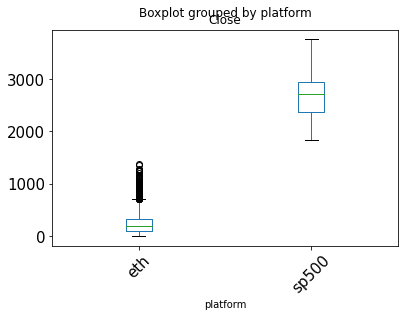

In [32]:
data.boxplot(by='platform', column = 'Close', grid=False, rot=45, fontsize=15) 